# Logistic Regression Model

In [23]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
# Importing encoded data created in Linear Regression Model
encoded_data = pd.read_csv("../data/encoded_data.csv")
encoded_data = encoded_data.drop(columns =['Platform_0', 'Platform_1',
       'Platform_2', 'Platform_3', 'Platform_4', 'Platform_5', 'Platform_6',
       'Platform_7', 'Genre_0', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4',
       'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10',
       'Genre_11',"Price","Console", "Name", "Game Title", "Platform LabelCode", "Genre LabelCode", "Publisher"])

In [118]:
encoded_data.columns

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Mean', 'Median'],
      dtype='object')

## Train, Test, Split

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop(["Mean"],axis=1), 
                                                    encoded_data["Mean"], test_size=0.35, 
                                                    random_state=42)

## Training and Predicting

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [157]:
predictions = logmodel.predict(X_test)

## Evaluation

In [194]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [229]:
cl_report = classification_report(y_test,predictions)
matrix_array = confusion_matrix(y_test,predictions)
print(matrix_array)
print('\n')
print(cl_report)

[[295  16]
 [109  30]]


              precision    recall  f1-score   support

       False       0.73      0.95      0.83       311
        True       0.65      0.22      0.32       139

    accuracy                           0.72       450
   macro avg       0.69      0.58      0.57       450
weighted avg       0.71      0.72      0.67       450



## Summary of Analysis

* The classes of False and True indicate if the game price is above (True) the average price of all the games in the data set.  

* Confusion Matrix:  
    In row 1, of the 311 false Mean values, 295 were predicted correctly, and 16 were predicted as true. In row 2, of the 138 true Mean values, 109 were predicted correctly and 30 were predected as false.  
  
* Classification Report:  
    The test data percentage that gave us the best F1-Score and accuracy was 35%.  
    Precision is intuitively the ability of the classifier not to label as positive a sample that is negative.  
    Recall is intuitively the ability of the classifier to find all the positive samples.  
    The F1-Score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1-Score reaches its best value at 1 and worst score at 0.  
    Support is the number of occurrences of each class.

In [293]:
matrix_array_df = pd.DataFrame(matrix_array)
matrix_array_df = matrix_array_df.rename(index={0 : "False", 1 : "True"})
matrix_array_df = matrix_array_df.rename(columns={0 : "Correct \n Predictions", 1 : "Incorrect \n Predictions"})
matrix_array_df = matrix_array_df.reset_index()
matrix_array_df = matrix_array_df.rename(columns={"index" : "Above Avg Price"})
matrix_array_df

,Above Avg Price,Correct \n Predictions,Incorrect \n Predictions
0,False,295,16
1,True,109,30


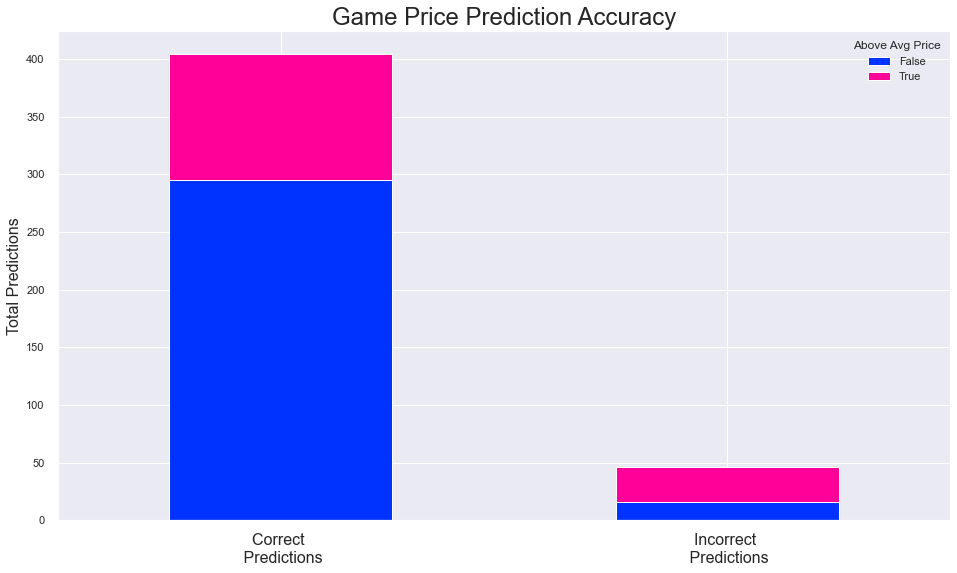

In [387]:
sns.set()
stack_plot = matrix_array_df.set_index('Above Avg Price').T.plot(kind='bar', 
            stacked=True, color=["#0033FF", "#FF0099"], figsize=(16,9))
ylabel = "Total Predictions"
plt.ylabel(ylabel,fontsize="16")
plt.xticks(rotation=360, size="16")
plt.title("Game Price Prediction Accuracy", size="24")
plt.savefig("../static/img/matrix_plot.png")

In [367]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
from yellowbrick.style import set_palette


/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


<AxesSubplot:title={'center':'Logistic Regression Learning Model'}>

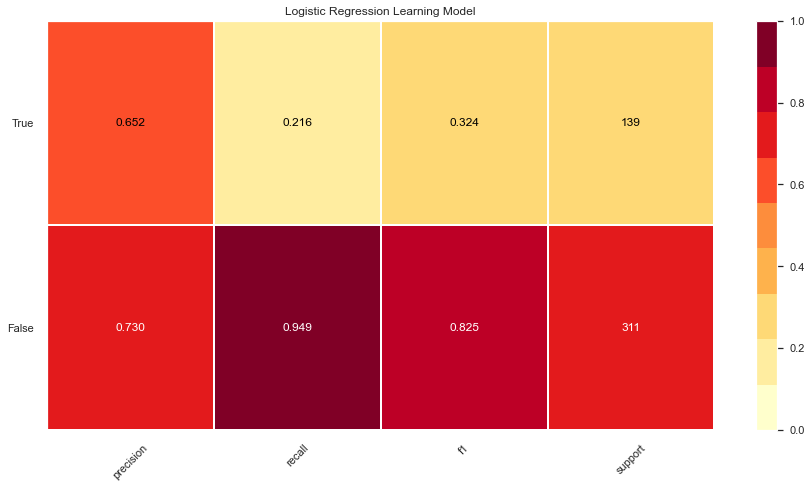

In [369]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(logmodel, support=True, title="Logistic Regression Learning Model", 
                                  color="bold", size=(900, 500))
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="../static/img/report_plot.png") # Draw/show the data